# Análises referentes às questões A, B e C

In [240]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats


In [241]:
df_a = pd.read_csv("resultados/resultado_questao_a.csv")

## Questão A

In [242]:
def calcular_estatisticas(tempos, nivel_confianca=0.95, margem_erro=0.02):
    media = np.mean(tempos)
    desvio_padrao = np.std(tempos, ddof=1)  # Usar ddof=1 para desvio padrão amostral
    z = norm.ppf((1 + nivel_confianca) / 2)  # Valor crítico para nível de confiança de 95%
    E = margem_erro * media  # Margem de erro como 2% da média
    n = (z * desvio_padrao / E) ** 2  # Tamanho da amostra
    return media, desvio_padrao, n

# Separar os tempos de execução por algoritmo
tempos_quick = df_a[df_a['Algoritmo'] == 'quick']['TempoDeOrdenacao']
tempos_merge = df_a[df_a['Algoritmo'] == 'merge']['TempoDeOrdenacao']
tempos_counting = df_a[df_a['Algoritmo'] == 'counting']['TempoDeOrdenacao']

# Calcular estatísticas para cada algoritmo
media_quick, desvio_quick, n_quick = calcular_estatisticas(tempos_quick)
media_merge, desvio_merge, n_merge = calcular_estatisticas(tempos_merge)
media_counting, desvio_counting, n_counting = calcular_estatisticas(tempos_counting)

n_quick = int(n_quick)
n_merge = int(n_merge)
n_counting = int(n_counting)

# Exibir resultados
print("Quick Sort:")
print(f"Média: {media_quick:.2f} ms, Desvio Padrão: {desvio_quick:.2f} ms, Tamanho da Amostra: {n_quick:}")
print("\nMerge Sort:")
print(f"Média: {media_merge:.2f} ms, Desvio Padrão: {desvio_merge:.2f} ms, Tamanho da Amostra: {n_merge:}")
print("\nCounting Sort:")
print(f"Média: {media_counting:.2f} ms, Desvio Padrão: {desvio_counting:.2f} ms, Tamanho da Amostra: {n_counting:}")


Quick Sort:
Média: 1007.40 ms, Desvio Padrão: 23.25 ms, Tamanho da Amostra: 5

Merge Sort:
Média: 1345.30 ms, Desvio Padrão: 16.55 ms, Tamanho da Amostra: 1

Counting Sort:
Média: 418.67 ms, Desvio Padrão: 30.66 ms, Tamanho da Amostra: 51


Como pudemos vê o algoritmo Counting Sort é o mais rápido em executar a tarefa, além de possuir um desvio padrão evidentemente menor que os demais. Entretanto, para garantir um intervalo de confiança com uma margem de erro menor ou igual a 2% e um nível de confiança de 95%, cada algoritmo deve ser executado 38 vezes, visto que esse foi o maior tamanho de amostra necessário obtido, sendo ele do algoritmo de Counting Sort.

Abaixo estão alguns gráficos que representam bem a diferença de eficiência entre os algoritmos e o desvio padrão:

### Gráfico 1

<Figure size 640x480 with 0 Axes>

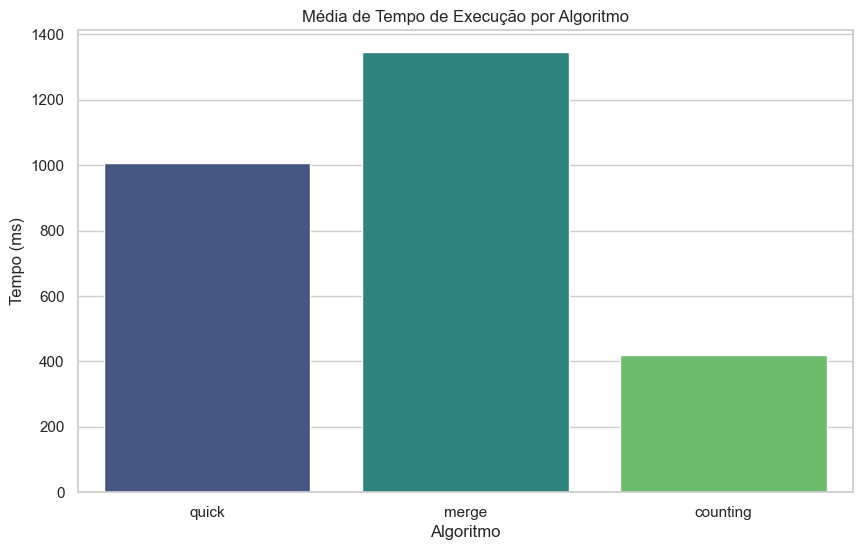

In [243]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Algoritmo', y='TempoDeOrdenacao', hue="Algoritmo", data=df_a, palette="viridis", legend=False, errorbar=None)
plt.title("Média de Tempo de Execução por Algoritmo")
plt.ylabel("Tempo (ms)")
plt.xlabel("Algoritmo")

nome_arquivo = os.path.join('graficos', 'grafico-1.jpg')
plt.savefig(nome_arquivo, format='jpg', dpi=300, bbox_inches='tight')

plt.show()

### Gráfico 2

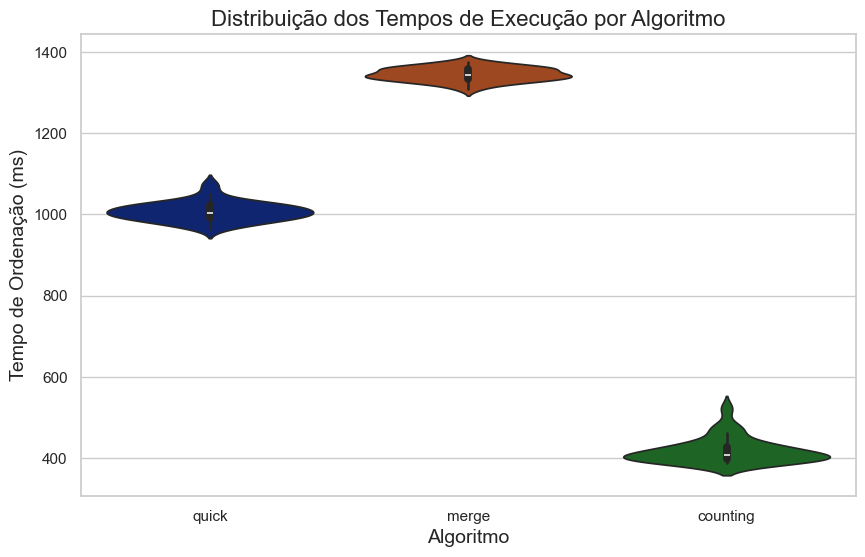

In [244]:

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(x='Algoritmo', y='TempoDeOrdenacao', hue="Algoritmo", data=df_a, palette="dark")


nome_arquivo = os.path.join('graficos', 'grafico-2.jpg')
plt.savefig(nome_arquivo, format='jpg', dpi=300, bbox_inches='tight')


plt.title('Distribuição dos Tempos de Execução por Algoritmo', fontsize=16)
plt.xlabel('Algoritmo', fontsize=14)
plt.ylabel('Tempo de Ordenação (ms)', fontsize=14)
plt.show()

## Questão B

In [245]:
df_b = pd.read_csv("resultados/resultado_questao_b.csv")

In [246]:
# Função para calcular média e desvio padrão
def calcular_media_desvio_padrao(tempos):
    media = np.mean(tempos)
    desvio_padrao = np.std(tempos, ddof=1)  # Desvio padrão amostral
    return media, desvio_padrao

# Função para calcular o intervalo de confiança
def calcular_intervalo_confianca(media, desvio_padrao, n, confianca=0.95):
    erro_padrao = desvio_padrao / np.sqrt(n)
    intervalo = stats.t.interval(confianca, n-1, loc=media, scale=erro_padrao)
    return intervalo

# Definir o tamanho da amostra (n)
n = 38  # Usando o maior valor de n obtido anteriormente

# Calcular métricas para cada algoritmo
algoritmos = df_b['Algoritmo'].unique()  # Lista de algoritmos únicos

for algoritmo in algoritmos:
    # Filtrar os tempos de execução para o algoritmo atual
    tempos = df_b[df_b['Algoritmo'] == algoritmo]['TempoDeOrdenacao']
    
    # Calcular média e desvio padrão
    media, desvio_padrao = calcular_media_desvio_padrao(tempos[:n])  # Usar apenas os primeiros n valores
    
    # Calcular intervalo de confiança
    intervalo = calcular_intervalo_confianca(media, desvio_padrao, n)
    
    # Exibir resultados
    print(f"\n{algoritmo.capitalize()} Sort:")
    print(f"Média: {media:.2f} ms")
    print(f"Desvio Padrão: {desvio_padrao:.2f} ms")
    print(f"Intervalo de Confiança (95%): ({intervalo[0]:.2f}, {intervalo[1]:.2f}) ms")


Quick Sort:
Média: 1034.47 ms
Desvio Padrão: 51.32 ms
Intervalo de Confiança (95%): (1017.60, 1051.34) ms

Merge Sort:
Média: 1350.79 ms
Desvio Padrão: 29.49 ms
Intervalo de Confiança (95%): (1341.10, 1360.48) ms

Counting Sort:
Média: 398.76 ms
Desvio Padrão: 11.34 ms
Intervalo de Confiança (95%): (395.03, 402.49) ms


### Gráfico 3

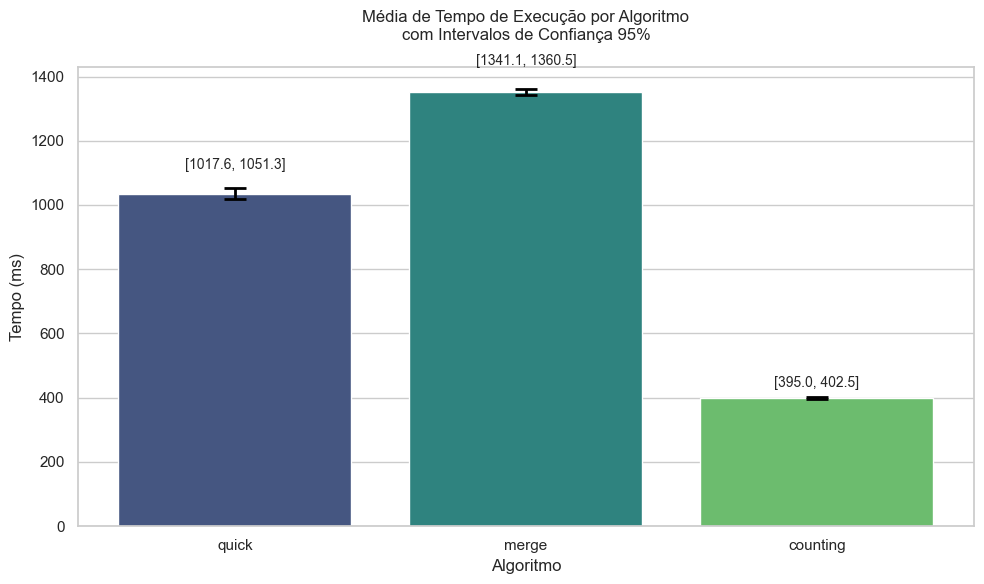

In [247]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Algoritmo', y='TempoDeOrdenacao', hue="Algoritmo", 
                 data=df_b, palette="viridis", legend=False, errorbar=None)

# 2. Calcular e adicionar os intervalos de confiança manualmente
for i, algoritmo in enumerate(df_b['Algoritmo'].unique()):
    
    dados_algo = df_b[df_b['Algoritmo'] == algoritmo]['TempoDeOrdenacao']
    
    media = np.mean(dados_algo)
    desvio_padrao = np.std(dados_algo, ddof=1)
    n = len(dados_algo)
    intervalo = calcular_intervalo_confianca(media, desvio_padrao, n)
    
    plt.errorbar(
        x=i, 
        y=media,
        yerr=[[media - intervalo[0]], [intervalo[1] - media]],
        fmt='none', # Sem marcador
        ecolor='black',
        elinewidth=2,
        capsize=8,
        capthick=2
    )
    plt.text(
        i, intervalo[1] + 0.05*media,
        f"[{intervalo[0]:.1f}, {intervalo[1]:.1f}]",
        ha='center',
        va='bottom',
        fontsize=10
    )

nome_arquivo = os.path.join('graficos', 'grafico-3.jpg')
plt.savefig(nome_arquivo, format='jpg', dpi=300, bbox_inches='tight')

plt.title("Média de Tempo de Execução por Algoritmo\ncom Intervalos de Confiança 95%", pad=20)
plt.ylabel("Tempo (ms)")
plt.xlabel("Algoritmo")
plt.tight_layout()
plt.show()

## Questão C    

Counting Sort se provou o melhor visto que ele possuí menor média e desvio padrão padrão se comparado com os demais, além de seu intervalo de confiança não sobrepor o de seus adversários. Em seguida vem o algoritmo de Quick Sorte que possuí média e intervalo de confiança menor que o último colocado, o algoritmo de Merge Sort. Entretanto, o algoritmo de Quick Sort possuí o maior desvio padrão, mas isso não afeta muito o resultado final, afinal, mesmo com o desvio, sua média é menor que a do merge sort.

O gráfico 3 nos dá uma representação visual na qual podemos deduzir qual é o melhor dado os critérios escolhidos.